---
# **Vector and matrix transpose**
---

## Import

In [21]:
import torch
torch. __version__

'1.8.1'

In [22]:
import numpy as np

## Numpy

In [27]:
nv = np.array([[1, 2, 3]])

nvT = nv.T

print(nv, end='\n\n')
print(nvT, end='\n\n')
print(nvT.T, end='\n\n')

[[1 2 3]]

[[1]
 [2]
 [3]]

[[1 2 3]]



In [31]:
nM = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

nMT = nM.T

print(nM, end='\n\n')
print(nMT, end='\n\n')
print(nMT.T, end='\n\n')

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]

[[1 2 3]
 [4 5 6]]



## Pytorch

In [32]:
tv = torch.Tensor([[1, 2, 3]])

tvT = tv.T

print(tv, end='\n\n')
print(tvT, end='\n\n')
print(tvT.T, end='\n\n')

tensor([[1., 2., 3.]])

tensor([[1.],
        [2.],
        [3.]])

tensor([[1., 2., 3.]])



In [33]:
tM = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

tMT = tM.T

print(tM, end='\n\n')
print(tMT, end='\n\n')
print(tMT.T, end='\n\n')

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])



## Data types

In [34]:
print(f'Variable nv is of type {type(nv)}')
print(f'Variable nM is of type {type(nM)}')
print(f'Variable tv is of type {type(tv)}')
print(f'Variable tM is of type {type(tM)}')

Variable nv is of type <class 'numpy.ndarray'>
Variable nM is of type <class 'numpy.ndarray'>
Variable tv is of type <class 'torch.Tensor'>
Variable tM is of type <class 'torch.Tensor'>


---
# **The dot product**
---

In [1]:
import numpy as np
import torch

## Numpy

In [2]:
tv1 = np.array([1, 2, 3, 4])
tv2 = np.array([0, 1, 0, -1])

print(np.dot(tv1, tv2))
print(np.sum(tv1*tv2))

-2
-2


## PyTorch

In [3]:
tv1 = torch.tensor([1, 2, 3, 4])
tv2 = torch.tensor([0, 1, 0, -1])

print(torch.dot(tv1, tv2))
print(torch.sum(tv1*tv2))

tensor(-2)
tensor(-2)


---
# **Matrix multiplication**
---

In [4]:
import numpy as np
import torch

## Numpy

In [9]:
# np.matmul(A, B) == A@B

A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

print(np.round(A@B, 2), end='\n\n')
print(np.round(C.T@A, 2))

[[-0.22  1.31 -0.31  1.07  2.45]
 [-0.88 -1.36  3.72  2.11 -2.83]
 [ 0.39  0.96 -0.67  1.12  2.87]]

[[-2.33 -0.19 -1.24  0.17]
 [-1.01 -0.36 -0.48  0.02]
 [ 0.26  1.12  1.05 -0.09]
 [ 0.56  0.04  0.4  -0.07]
 [-2.83  1.91  0.14  0.1 ]
 [-2.77 -1.41 -2.15  0.21]
 [ 2.6  -0.1   0.52 -0.02]]


## PyTorch

In [15]:
A = torch.randn(3,4)
B = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor(C1, dtype=torch.float)

print(np.round(A@B), end='\n\n')
print(np.round(A@C1), end='\n\n')
print(np.round(A@C2))

tensor([[ 1., -2.,  1., -2.,  1.],
        [ 2., -2.,  1., -2., -1.],
        [-2.,  1.,  1., -2.,  0.]])

tensor([[-0.,  2.,  1.,  2., -3.,  1.,  3.],
        [-1.,  1.,  2.,  3.,  2.,  1.,  1.],
        [ 1., -2., -2., -2.,  1., -1.,  0.]], dtype=torch.float64)

tensor([[-0.,  2.,  1.,  2., -3.,  1.,  3.],
        [-1.,  1.,  2.,  3.,  2.,  1.,  1.],
        [ 1., -2., -2., -2.,  1., -1.,  0.]])


---
# **Softmax**
---

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Numpy

In [41]:
z = [1, 2, 3]

num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


In [42]:
z = np.random.randint(-5, 15, 25)

num = np.exp(z)
den = np.sum(np.exp(z))
sigma1 = num / den

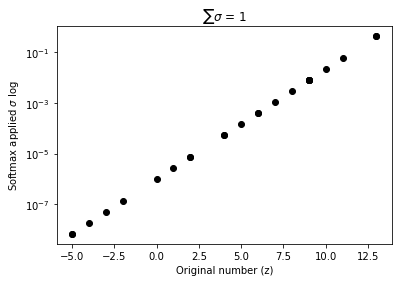

In [43]:
plt.plot(z, sigma1, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax applied $\sigma$ log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.yscale('log')
plt.show()

## PyTorch

In [45]:
z = [1, 2, 3]

softmax = nn.Softmax(dim=0)

sigmaT = softmax( torch.Tensor(z) )

print(sigmaT)

tensor([0.0900, 0.2447, 0.6652])


## Compare results

In [50]:
r = np.corrcoef(sigma, sigmaT)[0, 1]

print(f'The two methods correlate at r = {r}')

The two methods correlate at r = 1.0
